In [15]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import binarize
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from mapseq_fxns import sort_by_celltype
# from math import log10
from scipy import stats

# random sample consimment between runs
import random
# set random seed
random.seed(10)


%matplotlib inline



In [11]:

# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/'
out_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/output/'

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)
# seperate by cell type

omc_type = [sort_by_celltype(omc_bin[i]) for i in range(num_samples)]
omc_pt = [(omc_type[i][omc_type[i]['type']==1000]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]
omc_it = [(omc_type[i][omc_type[i]['type']==10]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]

omc_mm = []
omc_st = []
omc_pt_mm = []
omc_pt_st = []
omc_it_mm = []
omc_it_st = []
mice_mm=[]
mice_st=[]
dataset_mm = []
dataset_st = []

for i in range(num_samples):
    if metadata.species[i] == 'Mmus':
        omc_mm.append(omc_type[i])
        omc_pt_mm.append(omc_pt[i])
        omc_it_mm.append(omc_it[i])
        mice_mm.append(mice[i])
        dataset_mm.append(dataset[i])
    else:
        omc_st.append(omc_type[i])
        omc_pt_st.append(omc_pt[i])
        omc_it_st.append(omc_it[i])
        mice_st.append(mice[i])
        dataset_st.append(dataset[i])

omc_mm_all = pd.concat(omc_mm)
omc_st_all = pd.concat(omc_st)


In [12]:

def clean_up_data(df_dirty, to_drop = ['OB', 'ACAi', 'ACAc', 'HIP']):

    # drop unused areas
    dropped = df_dirty.drop(to_drop, axis=1)

    # change RN to bs
    replaced = dropped.rename(columns={'RN':'BS'})

    # drop neurons w/ 0 projections after removing negative regions
    nodes = replaced.drop(["OMCi"], axis=1).sum(axis=1)
    n_idx = nodes > 0 # non-zero projecting neurons
    clean = replaced[n_idx]
    

    return clean


In [13]:

for i in range(len(omc_it_mm)):
    omc_it_mm[i] = clean_up_data(omc_it_mm[i])

for i in range(len(omc_pt_mm)):
    omc_pt_mm[i] = clean_up_data(omc_pt_mm[i])

for i in range(len(omc_it_st)):
    omc_it_st[i] = clean_up_data(omc_it_st[i])

for i in range(len(omc_pt_st)):
    omc_pt_st[i] = clean_up_data(omc_pt_st[i])

omc_it_mm_all = pd.concat(omc_it_mm)
omc_it_st_all = pd.concat(omc_it_st)

omc_pt_mm_all = pd.concat(omc_pt_mm)
omc_pt_st_all = pd.concat(omc_pt_st)

# Example Lab mouse

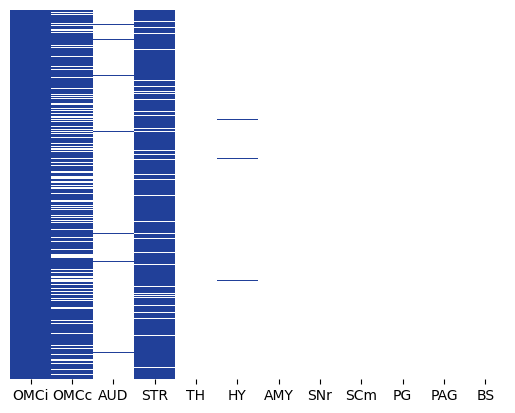

In [35]:
plot = omc_it_mm_all.sample(1000, random_state=10).reset_index(drop=True)

sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

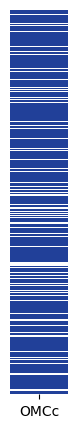

In [41]:
# just plot OMCc
area = 'OMCc'
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm_all.sample(1000, random_state=10).reset_index(drop=True)
plot = pd.DataFrame(sample[area])
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
# plot

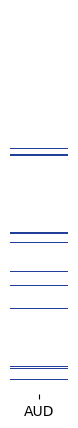

In [42]:
area = 'AUD'
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm_all.sample(1000, random_state=10).reset_index(drop=True)
plot = pd.DataFrame(sample[area])
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

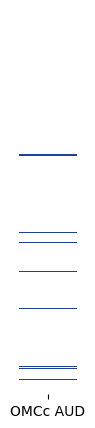

In [48]:
# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm_all.sample(1000, random_state=10).reset_index(drop=True)
sample
aud_omc = sample['OMCc'] + sample['AUD']
both = aud_omc == 2
plot = pd.DataFrame(both, columns=['OMCc AUD'])
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

# example lab mouse

<AxesSubplot: >

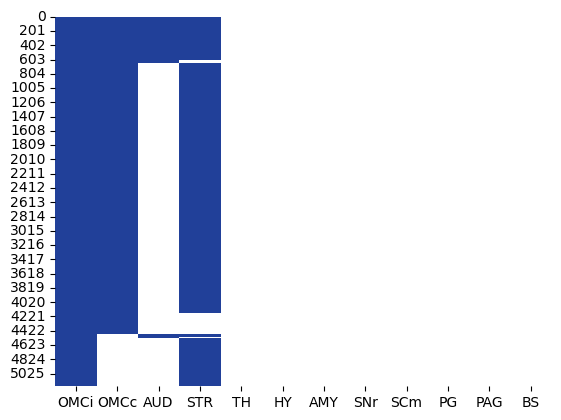

In [52]:
plot = omc_it_mm[3]

sns.heatmap(plot, cmap=blue_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)

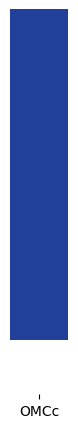

In [54]:
# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm[3]['OMCc']
# aud_omc = sample['OMCc'] + sample['AUD']
# both = aud_omc == 2
plot = pd.DataFrame(sample)
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

<AxesSubplot: >

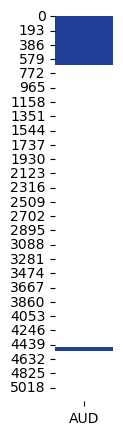

In [57]:
# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm[3]['AUD']
# aud_omc = sample['OMCc'] + sample['AUD']
# both = aud_omc == 2
plot = pd.DataFrame(sample)
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)

<AxesSubplot: >

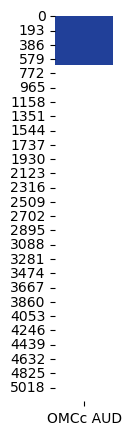

In [58]:
# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm[3]
aud_omc = sample['OMCc'] + sample['AUD']
both = aud_omc == 2
plot = pd.DataFrame(both, columns=['OMCc AUD'])
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)

## obs vs. expected